In [1]:
from IPython import get_ipython


In [2]:
#Load packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Check versions
import sys
print("Python version:", sys.version)
print("Numpy version:", np.version.version)
print("Pandas version:", pd.__version__)
print("Seaborn version:", sns.__version__)

get_ipython().run_line_magic('load_ext', 'autotime')


Python version: 3.7.4 (v3.7.4:e09359112e, Jul  8 2019, 14:54:52) 
[Clang 6.0 (clang-600.0.57)]
Numpy version: 1.17.4
Pandas version: 0.25.3
Seaborn version: 0.9.0


In [3]:
train_path1 = 'Mercari_Price_Suggestion_Project_Kaggle/data/train.tsv'
test_path1 = 'Mercari_Price_Suggestion_Project_Kaggle/data/test.tsv'

train = pd.read_csv(train_path1,sep ='\t')
test = pd.read_csv(test_path1, sep = '\t')

print(train.shape)
print(test.shape)

(1482535, 8)
(693359, 7)
------------------
Executed time in : 12.5 s


In [4]:
train.head(10)

train_id                                    name  item_condition_id  \
0         0     MLB Cincinnati Reds T Shirt Size XL                  3   
1         1        Razer BlackWidow Chroma Keyboard                  3   
2         2                          AVA-VIV Blouse                  1   
3         3                   Leather Horse Statues                  1   
4         4                    24K GOLD plated rose                  1   
5         5        Bundled items requested for Ruie                  3   
6         6      Acacia pacific tides santorini top                  3   
7         7    Girls cheer and tumbling bundle of 7                  3   
8         8                   Girls Nike Pro shorts                  3   
9         9  Porcelain clown doll checker pants VTG                  3   

                                       category_name       brand_name  price  \
0                                  Men/Tops/T-shirts              NaN   10.0   
1  Electronics/Computers & Tablets/Components & P...            Razer   52.0   
2                        Women/Tops & Blouses/Blouse           Target   10.0   
3                 Home/Home Décor/Home Décor Accents              NaN   35.0   
4                            Women/Jewelry/Necklaces              NaN   44.0   
5                                  Women/Other/Other              NaN   59.0   
6                           Women/Swimwear/Two-Piece  Acacia Swimwear   64.0   
7                    Sports & Outdoors/Apparel/Girls            Soffe    6.0   
8                    Sports & Outdoors/Apparel/Girls             Nike   19.0   
9           Vintage & Collectibles/Collectibles/Doll              NaN    8.0   

   shipping                                   item_description  
0         1                                 No description yet  
1         0  This keyboard is in great condition and works ...  
2         1  Adorable top with a hint of lace and a key hol...  
3         1  New with tags. Leather horses. Retail for [rm]...  
4         0          Complete with certificate of authenticity  
5         0  Banana republic bottoms, Candies skirt with ma...  
6         0  Size small but straps slightly shortened to fi...  
7         1  You get three pairs of Sophie cheer shorts siz...  
8         0   Girls Size small Plus green. Three shorts total.  
9         0  I realized his pants are on backwards after th...

------------------
Executed time in : 57.7 ms


 train.tsv, test.tsv
 The files consist of a list of product listings. These files are tab-delimited.
 train_id or test_id - the id of the listing
 name - the title of the listing. Note that we have cleaned the data to remove text that look like prices (e.g. $20) to avoid leakage. These removed prices are represented as [rm]
 item_condition_id - the condition of the items provided by the seller
 category_name - category of the listing
 brand_name
 price - the price that the item was sold for. This is the target variable that you will predict. The unit is USD. This column doesn't exist in test.tsv since that is what you will predict.
 shipping - 1 if shipping fee is paid by seller and 0 by buyer
 item_description - the full description of the item. Note that we have cleaned the data to remove text that look like prices (e.g. $20) to avoid leakage. These removed prices are represented as [rm]
 Please note that in stage 1, all the test data will be calculated on the public leaderboard. In stage 2, we will swap the test.tsv file to the complete test dataset that includes the private leaderboard data.
 sample_submission.csv
 A sample submission file in the correct format.
 test_id - matches the test_id column in test.tsv
 price

In [5]:
#Check for missing data
total_null = train.isna().sum().sort_values(ascending=False)
percent = (train.isna().sum()/train.isna().count()).sort_values(ascending=False)*100
missing_data=pd.concat([total_null, percent], axis=1, keys=['Total', 'Percent'])
print('Missing Data in Train')
print('Total observations: ',len(train.index))
missing_data

Missing Data in Train
Total observations:  1482535
------------------
Executed time in : 1.51 s


Total    Percent
brand_name         632682  42.675687
category_name        6327   0.426769
item_description        4   0.000270
shipping                0   0.000000
price                   0   0.000000
item_condition_id       0   0.000000
name                    0   0.000000
train_id                0   0.000000

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482535 entries, 0 to 1482534
Data columns (total 8 columns):
train_id             1482535 non-null int64
name                 1482535 non-null object
item_condition_id    1482535 non-null int64
category_name        1476208 non-null object
brand_name           849853 non-null object
price                1482535 non-null float64
shipping             1482535 non-null int64
item_description     1482531 non-null object
dtypes: float64(1), int64(3), object(4)
memory usage: 90.5+ MB
------------------
Executed time in : 755 ms


In [7]:
train.describe()

train_id  item_condition_id         price      shipping
count  1.482535e+06       1.482535e+06  1.482535e+06  1.482535e+06
mean   7.412670e+05       1.907380e+00  2.673752e+01  4.472744e-01
std    4.279711e+05       9.031586e-01  3.858607e+01  4.972124e-01
min    0.000000e+00       1.000000e+00  0.000000e+00  0.000000e+00
25%    3.706335e+05       1.000000e+00  1.000000e+01  0.000000e+00
50%    7.412670e+05       2.000000e+00  1.700000e+01  0.000000e+00
75%    1.111900e+06       3.000000e+00  2.900000e+01  1.000000e+00
max    1.482534e+06       5.000000e+00  2.009000e+03  1.000000e+00

------------------
Executed time in : 782 ms


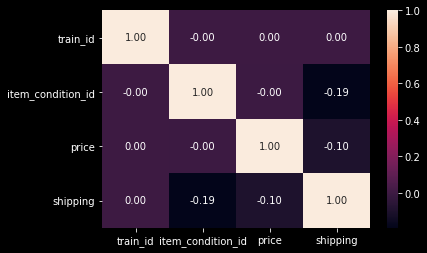

------------------
Executed time in : 1.81 s


In [9]:
#Correlation analysis
sns.heatmap(train.corr(), annot=True, fmt='.2f')
correlations = train.corr().abs().unstack().sort_values(kind="quicksort").reset_index()
correlations = correlations[correlations['level_0'] != correlations['level_1']]

In [10]:
correlations

level_0            level_1         0
0            train_id  item_condition_id  0.000113
1   item_condition_id           train_id  0.000113
2            train_id           shipping  0.000472
3            shipping           train_id  0.000472
4            train_id              price  0.000478
5               price           train_id  0.000478
6   item_condition_id              price  0.000807
7               price  item_condition_id  0.000807
8               price           shipping  0.097211
9            shipping              price  0.097211
10  item_condition_id           shipping  0.191154
11           shipping  item_condition_id  0.191154

------------------
Executed time in : 49.1 ms


In [11]:
train[train['name'] == '[rm]']

train_id  name  item_condition_id  \
111131     111131  [rm]                  3   
413351     413351  [rm]                  3   
472455     472455  [rm]                  3   
615033     615033  [rm]                  2   
615112     615112  [rm]                  2   
693052     693052  [rm]                  1   
787293     787293  [rm]                  2   
868267     868267  [rm]                  3   
887709     887709  [rm]                  3   
941904     941904  [rm]                  2   
1029934   1029934  [rm]                  3   
1152654   1152654  [rm]                  1   
1159156   1159156  [rm]                  1   
1258366   1258366  [rm]                  3   
1362684   1362684  [rm]                  1   

                                             category_name       brand_name  \
111131                            Men/Swimwear/Swim Trunks              NaN   
413351   Sports & Outdoors/Team Sports/Baseball & Softball     Under Armour   
472455                                   Women/Other/Other       FOREVER 21   
615033                                  Beauty/Makeup/Eyes              NaN   
615112                         Kids/Girls (4+)/Accessories          Justice   
693052                    Men/Men's Accessories/Sunglasses          Versace   
787293                                   Women/Other/Other              NaN   
868267                       Women/Tops & Blouses/T-Shirts       FOREVER 21   
887709                         Women/Coats & Jackets/Other              NaN   
941904                       Women/Tops & Blouses/T-Shirts  Brandy Melville   
1029934                           Kids/Girls 2T-5T/Dresses              Gap   
1152654              Sports & Outdoors/Apparel/Accessories              NaN   
1159156            Home/Home Appliances/Kitchen Appliances              NaN   
1258366                      Beauty/Makeup/Makeup Palettes              NaN   
1362684                            Electronics/Other/Other              NaN   

         price  shipping                                   item_description  
111131     9.0         0  Swimming shorts size 28 NFL Raiders in great c...  
413351    10.0         0  Baseball chest protection shirt in great condi...  
472455     8.0         0               Light blazer size M brand forever 21  
615033     9.0         0                                 No description yet  
615112    18.0         0                                 No description yet  
693052    44.0         0                                 No description yet  
787293    21.0         0   Med with elastic waistband and cuffed at bottom.  
868267     8.0         0  The first shirt is from Forever 21 its a size ...  
887709    16.0         0                                 Grey jacket size L  
941904    10.0         1                                 No description yet  
1029934   10.0         0            Size 5ys color jean blue brand Baby Gap  
1152654    6.0         1  Love pink lanyard. I have different colors ava...  
1159156   45.0         1  [rm] Bed Bath And Beyond Gift Card I got it fo...  
1258366   21.0         0                                           Reserved  
1362684    7.0         0                                 No description yet

------------------
Executed time in : 896 ms


In [12]:
train[train['item_description'] == '[rm]']

train_id                             name  item_condition_id  \
9585         9585                         Bundle!!                  3   
22332       22332                  Supreme sticker                  1   
37586       37586             Three chokers bundle                  1   
41619       41619                    Essential oil                  1   
53052       53052       Hello kitty waffle squishy                  1   
...           ...                              ...                ...   
1392193   1392193             X-Large Bape Sticker                  1   
1420149   1420149  Two plexus slim 30 packets each                  1   
1420832   1420832                           Bundle                  2   
1422047   1422047                    Louis Vuitton                  2   
1448877   1448877                    Mac Gift Card                  1   

                                       category_name     brand_name  price  \
9585                                             NaN            NaN   24.0   
22332                   Handmade/Paper Goods/Sticker            NaN    3.0   
37586                        Women/Jewelry/Necklaces            NaN    8.0   
41619                 Home/Home Décor/Home Fragrance     Aura Cacia    7.0   
53052    Vintage & Collectibles/Antique/Collectibles            NaN    5.0   
...                                              ...            ...    ...   
1392193                 Handmade/Paper Goods/Sticker            NaN    3.0   
1420149       Other/Daily & Travel items/Health Care            NaN   40.0   
1420832         Women/Athletic Apparel/Shirts & Tops            NaN   18.0   
1422047          Women/Women's Handbags/Shoulder Bag  Louis Vuitton   75.0   
1448877                          Beauty/Makeup/Other            MAC   25.0   

         shipping item_description  
9585            0             [rm]  
22332           1             [rm]  
37586           1             [rm]  
41619           0             [rm]  
53052           1             [rm]  
...           ...              ...  
1392193         1             [rm]  
1420149         1             [rm]  
1420832         0             [rm]  
1422047         0             [rm]  
1448877         1             [rm]  

[63 rows x 8 columns]

------------------
Executed time in : 1.02 s


 PRICE

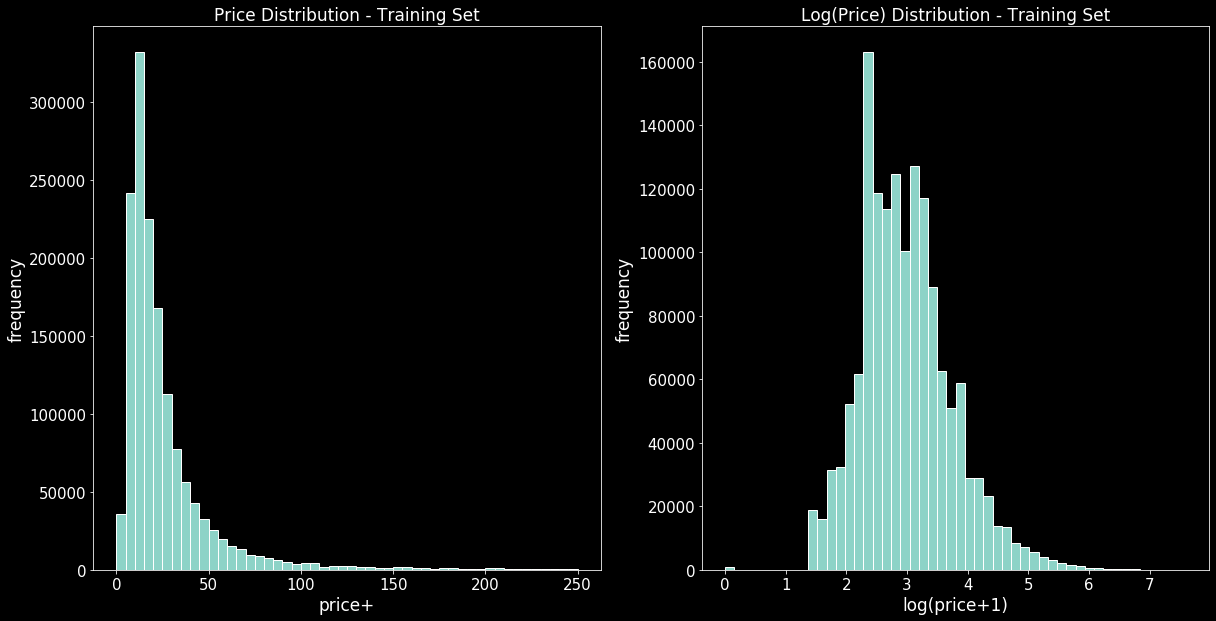

------------------
Executed time in : 2.64 s


In [13]:
# Ve phan phoi cua price
plt.subplot(1, 2, 1)
(train['price']).plot.hist(bins=50, figsize=(20,10), edgecolor='white',range=[0,250])
plt.xlabel('price+', fontsize=17)
plt.ylabel('frequency', fontsize=17)
plt.tick_params(labelsize=15)
plt.title('Price Distribution - Training Set', fontsize=17)
# Ve cot price theo ham log
plt.subplot(1, 2, 2)
np.log(train['price']+1).plot.hist(bins=50, figsize=(20,10), edgecolor='white')
plt.xlabel('log(price+1)', fontsize=17)
plt.ylabel('frequency', fontsize=17)
plt.tick_params(labelsize=15)
plt.title('Log(Price) Distribution - Training Set', fontsize=17)
plt.show()


 SHIPPING

In [14]:
# Ty le nguoi mua va nguoi ban tra tien ship
train.shipping.value_counts()/len(train)

0    0.552726
1    0.447274
Name: shipping, dtype: float64

------------------
Executed time in : 37.2 ms


In [15]:
print('Total Categories in category column : ',train['category_name'].nunique())
# TOP 10 RAW CATEGORIES
train['category_name'].value_counts()[:10]


Total Categories in category column :  1287
------------------
Executed time in : 1.02 s


Women/Athletic Apparel/Pants, Tights, Leggings                 60177
Women/Tops & Blouses/T-Shirts                                  46380
Beauty/Makeup/Face                                             34335
Beauty/Makeup/Lips                                             29910
Electronics/Video Games & Consoles/Games                       26557
Beauty/Makeup/Eyes                                             25215
Electronics/Cell Phones & Accessories/Cases, Covers & Skins    24676
Women/Underwear/Bras                                           21274
Women/Tops & Blouses/Blouse                                    20284
Women/Tops & Blouses/Tank, Cami                                20284
Name: category_name, dtype: int64

In [16]:
# missing categories
print("There are %d items that do not have a label." % train['category_name'].isnull().sum())


There are 6327 items that do not have a label.
------------------
Executed time in : 277 ms
